## Część 1. California Home Index - prognoza Timesfm

In [1]:
# wykonane w Google Colab przy użyciu runtime T4 GPU

!pip install huggingface_hub(cli)
!pip install utilsforecast
!pip install praxis
!pip install paxml
!pip install jax[cuda12]==0.4.26
!pip install einshape

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `pip install huggingface_hub(cli)'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of praxis to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is still looking at multiple versions of praxis to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install praxis==0.1, praxis==0.2.0, praxis==0.2.1, praxis==0.3.0, praxis==0.4.0, praxis==1.0.0, praxis==1.1.0, praxis==1.2.0, praxis==1.3.0, praxis==1.3.1 and pra

In [3]:
pip install timesfm[pax]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 6.6 MB/s eta 0:00:00


In [1]:
import timesfm

TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.


/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded PyTorch TimesFM.


In [5]:
tfm = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="gpu",
          per_core_batch_size=4,
          horizon_len=8,
          num_layers=50,
          #use_positional_embedding=False,
          context_len=96,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
  )

Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 24614.46it/s]


In [7]:
import pandas as pd
import os

df = pd.read_csv(os.path.join('..', 'Datasets', 'CASTHPI.csv'))

df.rename(columns={'observation_date': 'ds', 'CASTHPI': 'value'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])
df['unique_id']="California_index"
df.head(10)
df.shape

(200, 3)

In [8]:
from sklearn.metrics import mean_absolute_percentage_error


## Walk-forward validation z 2-letnim oknem


Trening: do 2000-01-01, Test: od 2000-01-02 do 2002-01-01
Processing dataframe with multiple processes.
TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.
Loaded PyTorch TimesFM.
Finished preprocessing dataframe.
Finished forecasting.
MAPE dla okna: 0.23%


/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


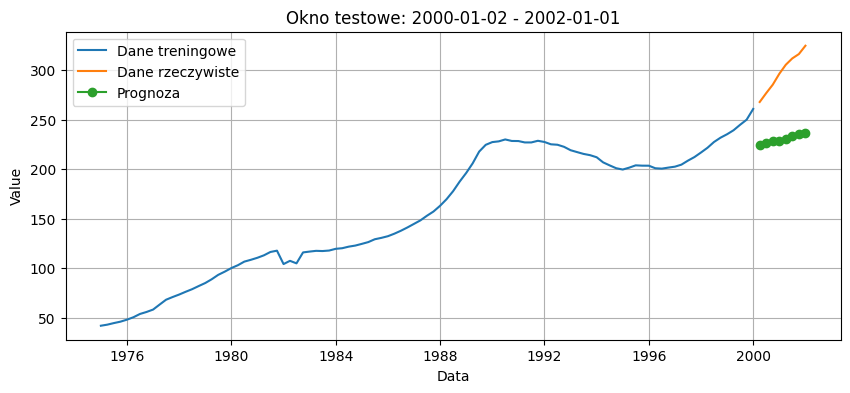


Trening: do 2002-01-01, Test: od 2002-01-02 do 2004-01-01
Processing dataframe with multiple processes.
TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.
Loaded PyTorch TimesFM.
Finished preprocessing dataframe.
Finished forecasting.
MAPE dla okna: 0.18%


/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


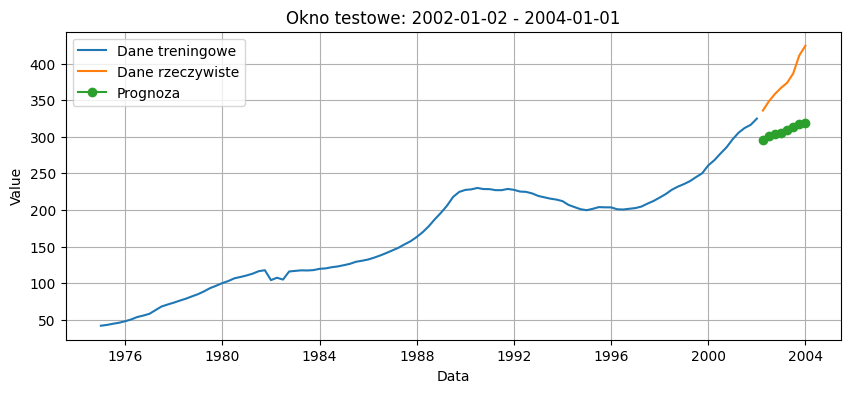


Trening: do 2004-01-01, Test: od 2004-01-02 do 2006-01-01
Processing dataframe with multiple processes.
TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.
Loaded PyTorch TimesFM.
Finished preprocessing dataframe.
Finished forecasting.
MAPE dla okna: 0.25%


/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


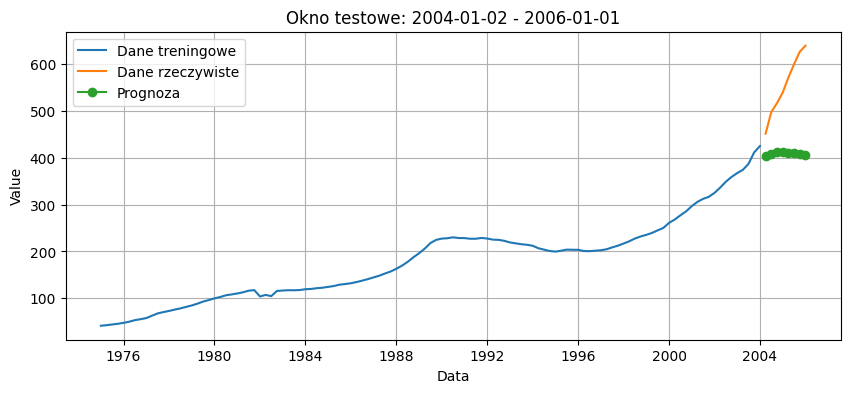


Trening: do 2006-01-01, Test: od 2006-01-02 do 2008-01-01
Processing dataframe with multiple processes.
TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.
Loaded PyTorch TimesFM.
Finished preprocessing dataframe.
Finished forecasting.
MAPE dla okna: 0.09%


/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


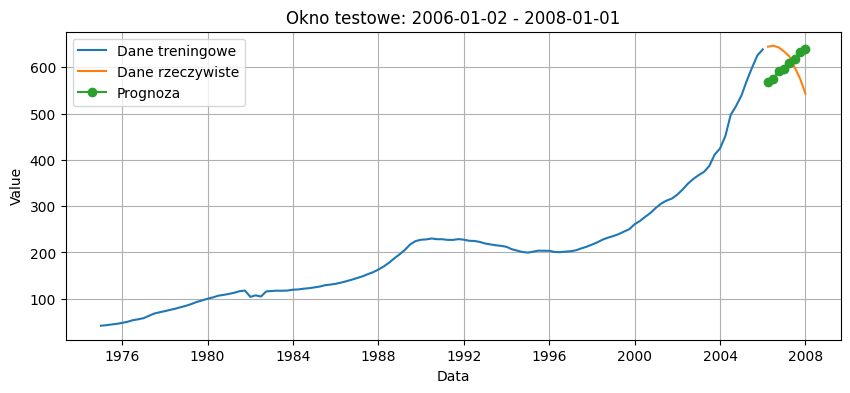


Trening: do 2008-01-01, Test: od 2008-01-02 do 2010-01-01
Processing dataframe with multiple processes.
TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.
Loaded PyTorch TimesFM.
Finished preprocessing dataframe.
Finished forecasting.
MAPE dla okna: 0.21%


/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


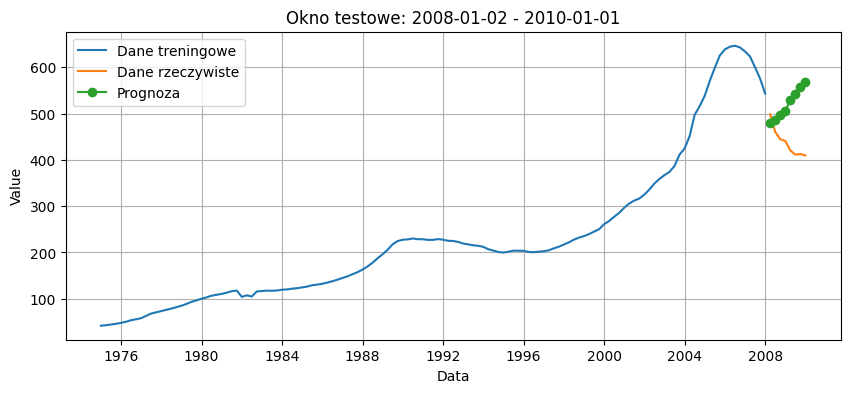


Trening: do 2010-01-01, Test: od 2010-01-02 do 2012-01-01
Processing dataframe with multiple processes.
TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.
Loaded PyTorch TimesFM.
Finished preprocessing dataframe.
Finished forecasting.
MAPE dla okna: 0.23%


/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


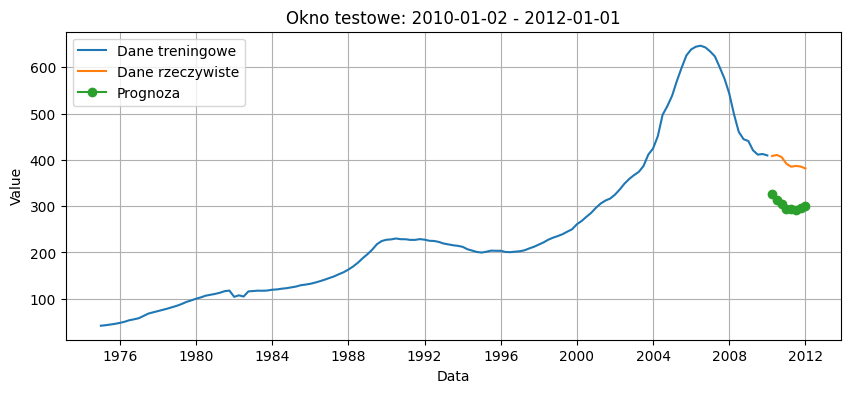


Trening: do 2012-01-01, Test: od 2012-01-02 do 2014-01-01
Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
MAPE dla okna: 0.14%


/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


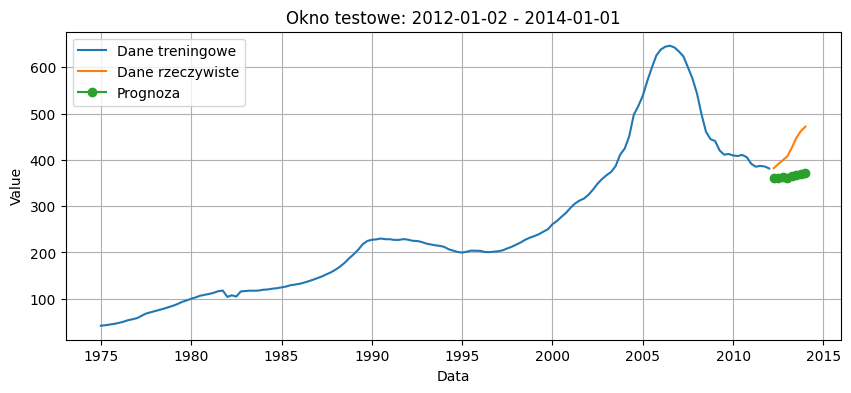


Trening: do 2014-01-01, Test: od 2014-01-02 do 2016-01-01
Processing dataframe with multiple processes.
TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.
Loaded PyTorch TimesFM.
Finished preprocessing dataframe.
Finished forecasting.
MAPE dla okna: 0.05%


/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


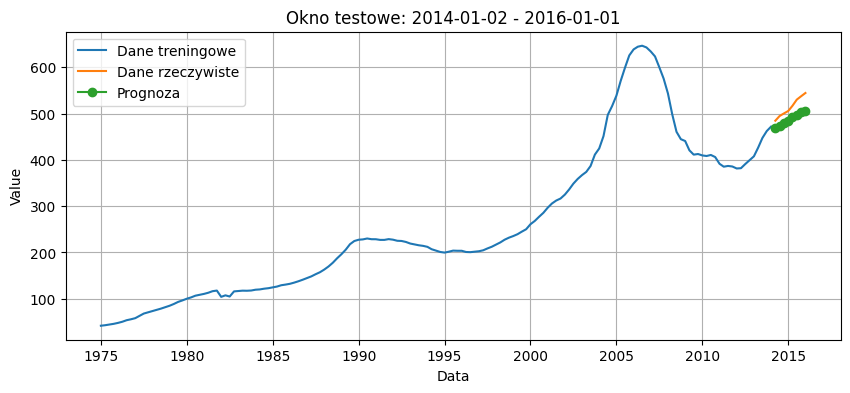


Trening: do 2016-01-01, Test: od 2016-01-02 do 2018-01-01
Processing dataframe with multiple processes.
TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.
Loaded PyTorch TimesFM.
Finished preprocessing dataframe.
Finished forecasting.
MAPE dla okna: 0.08%


/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


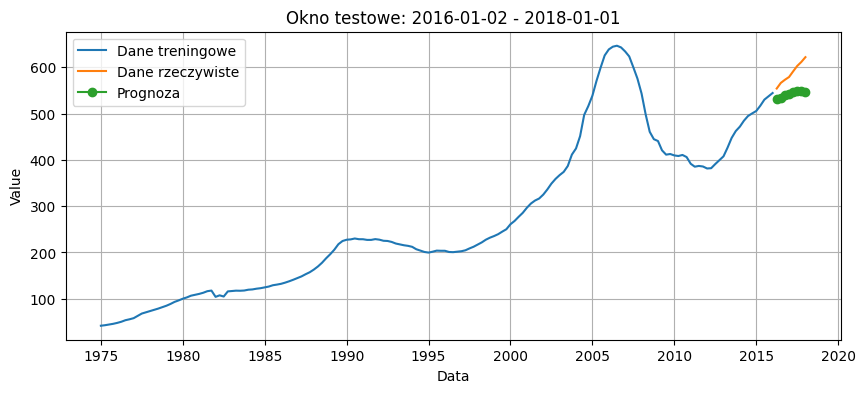


Trening: do 2018-01-01, Test: od 2018-01-02 do 2020-01-01
Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.
MAPE dla okna: 0.10%


/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


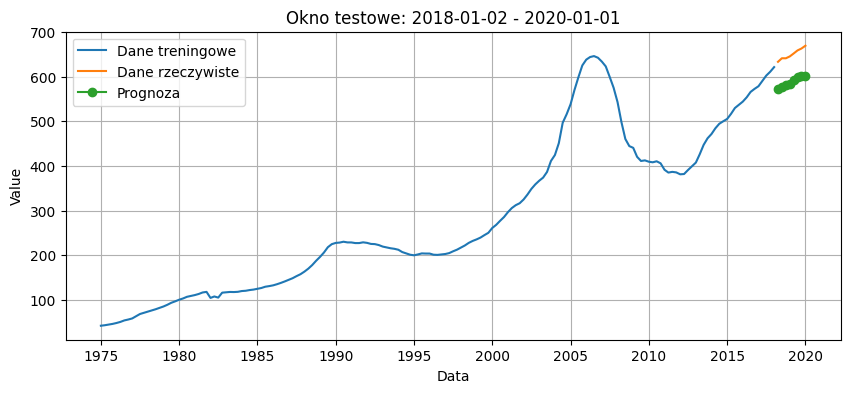


Trening: do 2020-01-01, Test: od 2020-01-02 do 2022-01-01
Processing dataframe with multiple processes.
TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.
Loaded PyTorch TimesFM.
Finished preprocessing dataframe.
Finished forecasting.
MAPE dla okna: 0.21%


/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


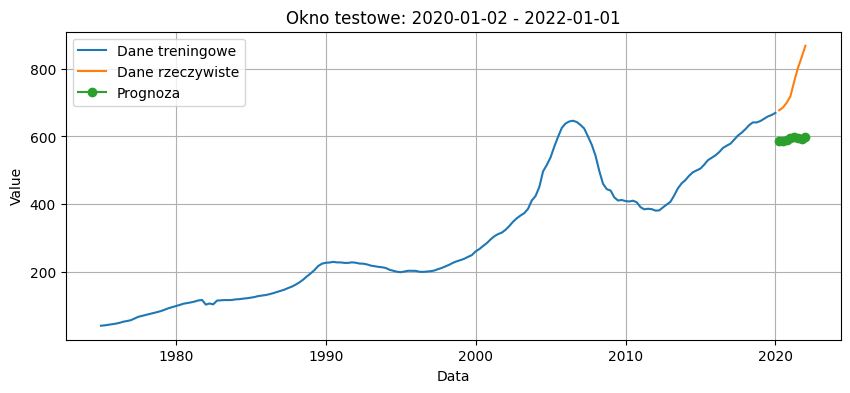


Trening: do 2022-01-01, Test: od 2022-01-02 do 2024-01-01
Processing dataframe with multiple processes.
TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.
Loaded PyTorch TimesFM.
Finished preprocessing dataframe.
Finished forecasting.
MAPE dla okna: 0.25%


/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


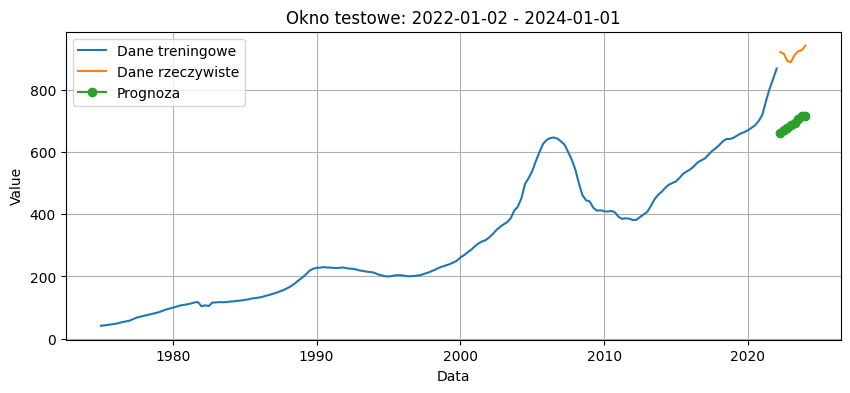


Średnie MAPE dla wszystkich okien: 0.17%


In [9]:
import numpy as np
from matplotlib import pyplot as plt

# Ustalmy początkowy zbiór treningowy jako pierwsza połowa danych
split_index = int(len(df) * 0.5)
initial_train_end = df['ds'].iloc[split_index]

# Ustawiamy horyzont prognozy na 2 lata (przy danych kwartalnych to 8 kwartałów)
forecast_horizon = pd.DateOffset(years=2)

# Inicjujemy training set jako dane do początkowego momentu
train_df = df[df['ds'] <= initial_train_end].copy()
current_train_end = initial_train_end

mape_scores = []

# Pętla walk-forward - tak długo, jak testowy okres mieści się w danych
while current_train_end + forecast_horizon <= df['ds'].max():
    # Określamy okres testowy: od dnia po zakończeniu treningu do 2 lat do przodu
    test_start = current_train_end + pd.DateOffset(days=1)
    test_end = current_train_end + forecast_horizon

    test_df = df[(df['ds'] >= test_start) & (df['ds'] <= test_end)].copy()
    if test_df.empty:
        print("Brak danych testowych w tym oknie.")
        break

    print(f"\nTrening: do {current_train_end.date()}, Test: od {test_start.date()} do {test_end.date()}")

    # Prognoza na podstawie bieżącego zbioru treningowego
    forecast_df = tfm.forecast_on_df(
        inputs=train_df,
        freq="Q",         # dane kwartalne
        value_name="value",
        num_jobs=-1,
    )

    # Zakładamy, że forecast_df zawiera kolumny: 'ds' (daty) oraz 'yhat' (prognozowane wartości)
    forecast_test = forecast_df[(forecast_df['ds'] >= test_start) & (forecast_df['ds'] <= test_end)].copy()
    if forecast_test.empty:
        print("Brak prognozy dla okresu testowego.")
        break

    # Aby dopasować daty, wykorzystamy merge_asof (łączenie najbliższych dat z tolerancją)
    merged = pd.merge_asof(
        test_df.sort_values('ds'),
        forecast_test.sort_values('ds'),
        on='ds',
        direction='nearest',
        tolerance=pd.Timedelta('31D')  # dopasowanie w obrębie 31 dni (dostosuj w razie potrzeby)
    )

    if merged.empty:
        print("Brak dopasowanych dat między forecast a danymi testowymi.")
    else:
        current_mape = mean_absolute_percentage_error(merged['value'], merged['timesfm'])
        mape_scores.append(current_mape)
        print(f"MAPE dla okna: {current_mape:.2f}%")

        # (Opcjonalnie) Rysujemy wykres dla danego okna
        plt.figure(figsize=(10,4))
        plt.plot(train_df['ds'], train_df['value'], label="Dane treningowe")
        plt.plot(merged['ds'], merged['value'], label="Dane rzeczywiste")
        plt.plot(merged['ds'], merged['timesfm'], label="Prognoza", marker='o')
        plt.xlabel("Data")
        plt.ylabel("Value")
        plt.title(f"Okno testowe: {test_start.date()} - {test_end.date()}")
        plt.legend()
        plt.grid()
        plt.show()

    # Rozszerzamy okno treningowe o okres testowy (expanding window) i przesuwamy horyzont
    train_df = df[df['ds'] <= test_end].copy()
    current_train_end = test_end

# Wyliczenie średniego MAPE
if mape_scores:
    avg_mape = np.mean(mape_scores)
    print(f"\nŚrednie MAPE dla wszystkich okien: {avg_mape:.2f}%")
else:
    print("Brak obliczonych wyników MAPE.")


## Czesc 2. Prognoza REIT

In [10]:
import yfinance as yf

ticker = yf.Ticker("^REI")  # podaj symbol indeksu lub ETF-u REIT
data = ticker.history(period="30d", interval="5m")  # np. dane minutowe z jednego dnia
print(data.head())
print(data.shape)
print(data.tail())


                                 Open        High         Low       Close  \
Datetime                                                                    
2025-02-24 09:30:00-05:00  408.600006  408.929993  408.140015  408.140015   
2025-02-24 09:35:00-05:00  408.109985  408.140015  406.950012  407.380005   
2025-02-24 09:40:00-05:00  407.290009  407.440002  407.089996  407.339996   
2025-02-24 09:45:00-05:00  407.369995  407.470001  407.029999  407.299988   
2025-02-24 09:50:00-05:00  407.290009  408.579987  407.200012  408.549988   

                           Volume  Dividends  Stock Splits  
Datetime                                                    
2025-02-24 09:30:00-05:00       0        0.0           0.0  
2025-02-24 09:35:00-05:00       0        0.0           0.0  
2025-02-24 09:40:00-05:00       0        0.0           0.0  
2025-02-24 09:45:00-05:00       0        0.0           0.0  
2025-02-24 09:50:00-05:00       0        0.0           0.0  
(2340, 7)
                       

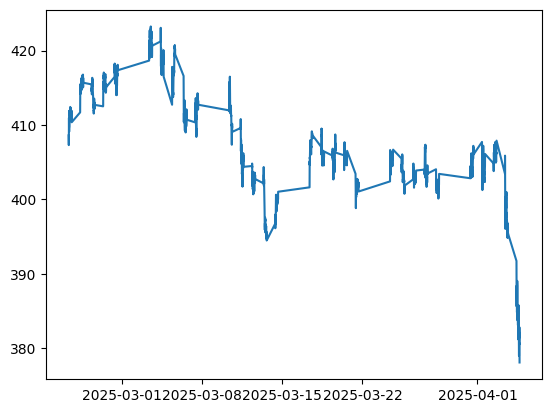

In [11]:
df_reit = data.reset_index()
df_reit.rename(columns={'Datetime': 'ds'}, inplace=True)
#df_reit['ds']=pd.to_datetime(df_reit['ds'])
# Zakładamy, że kolumna nazywa się 'ds'
#df_reit['ds'] = df_reit['ds'].dt.tz_localize(None)

df_reit=df_reit.iloc[:,0:5]
df_reit['unique_id']='REIT'

plt.plot(df_reit['ds'], df_reit['Open'])

In [13]:
tfm_reit = timesfm.TimesFm(
      hparams=timesfm.TimesFmHparams(
          backend="gpu",
          per_core_batch_size=32,
          horizon_len=32,
          num_layers=50,
          #use_positional_embedding=False,
          context_len=2304,
      ),
      checkpoint=timesfm.TimesFmCheckpoint(
          huggingface_repo_id="google/timesfm-2.0-500m-pytorch"),
  )

Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 40642.48it/s]


test size: 32


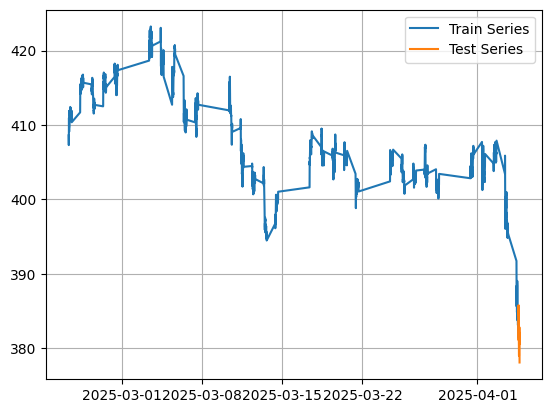

In [14]:
test_size = int(0.014 * len(df_reit))
train_df = df_reit.head(len(df_reit) - test_size)
test_df = df_reit.tail(test_size)
print("test size:", test_size)
plt.plot(train_df['ds'], train_df['Open'], label = "Train Series")
plt.plot(test_df['ds'], test_df['Open'], label = "Test Series")
plt.legend()
plt.grid()

In [15]:
forecast_df_reit = tfm_reit.forecast_on_df(
    inputs=train_df,
    freq="5T",  # 5 minutes
    value_name="Open",
    num_jobs=-1,
)

Processing dataframe with multiple processes.
TimesFM v1.2.0. See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded Jax TimesFM.
Loaded PyTorch TimesFM.
Finished preprocessing dataframe.
Finished forecasting.


/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:384: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/Users/marcin/EksploracjaDanych/venv/lib/python3.11/site-packages/utilsforecast/processing.py:440: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


In [37]:
forecast_df_reit

,unique_id,ds,timesfm,timesfm-q-0.1,timesfm-q-0.2,timesfm-q-0.3,timesfm-q-0.4,timesfm-q-0.5,timesfm-q-0.6,timesfm-q-0.7,timesfm-q-0.8,timesfm-q-0.9
0,REIT,2025-04-04 13:20:00-04:00,380.301361,379.233582,379.710114,379.978149,380.152344,380.301361,380.545685,380.851746,381.226593,381.795959
1,REIT,2025-04-04 13:25:00-04:00,380.429993,378.979462,379.616974,379.946289,380.217072,380.429993,380.692719,381.137329,381.617096,382.482697
2,REIT,2025-04-04 13:30:00-04:00,380.430969,378.611572,379.379028,379.837433,380.157043,380.430969,380.800964,381.320404,381.985626,383.063202
3,REIT,2025-04-04 13:35:00-04:00,380.711792,378.477356,379.409668,379.954498,380.323608,380.711792,381.117218,381.726166,382.505798,383.782288
4,REIT,2025-04-04 13:40:00-04:00,380.766510,378.271912,379.300751,379.899567,380.320160,380.766510,381.258850,381.949799,382.833679,384.294098
5,REIT,2025-04-04 13:45:00-04:00,380.830627,378.110382,379.182251,379.837494,380.349091,380.830627,381.395447,382.158569,383.175568,384.820343
6,REIT,2025-04-04 13:50:00-04:00,380.768860,377.814972,378.942993,379.684296,380.245117,380.768860,381.397888,382.264771,383.363312,385.148224
7,REIT,2025-04-04 13:55:00-04:00,380.887573,377.719269,378.894775,379.683167,380.296936,380.887573,381.577667,382.536804,383.754120,385.684265
8,REIT,2025-04-04 14:00:00-04:00,381.044220,377.579834,378.924744,379.728058,380.395996,381.044220,381.821014,382.813751,384.112427,386.192444
9,REIT,2025-04-04 14:05:00-04:00,381.064667,377.430176,378.792511,379.674927,380.393982,381.064667,381.872864,382.940033,384.348755,386.581207


## Prognoza dla w ramach jednego dnia (ale na podstawie prawie miesiąca)

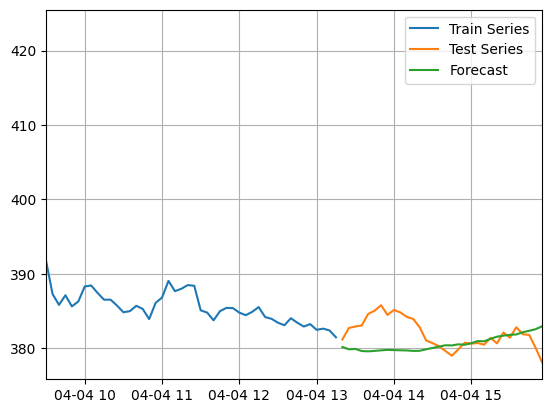

In [16]:
plt.plot(train_df['ds'], train_df['Open'], label = "Train Series")
plt.plot(test_df['ds'], test_df['Open'], label = "Test Series")
plt.plot(forecast_df_reit['ds'], forecast_df_reit['timesfm'], label="Forecast")

left_limit = pd.to_datetime('2025-04-04 09:30:00-04:00')
right_limit = pd.to_datetime('2025-04-04 15:55:00-04:00 ')
plt.xlim(left=left_limit, right=right_limit)
plt.legend()
plt.grid()